# 🏠 Street View House Numbers (SVHN) Dataset: Data Processing, Preprocessing, Model Training, and Evaluation

## 📚 Introduction

In this notebook, we explore the **Street View House Numbers (SVHN)** dataset, a popular benchmark for object recognition and image processing. The dataset contains over 600,000 labeled real-world images of house numbers collected from Google Street View, making it ideal for training machine learning models to identify house numbers in images with varying conditions.

The goal of this project is to process the dataset, extract digits using bounding box annotations, preprocess the data, and train a deep learning model capable of classifying the digits accurately. We also evaluate the model’s performance through training and validation accuracy and loss metrics.

---

## 🔍 What We Have Accomplished

1. **Data Loading and Setup**:  
   We imported necessary libraries such as `h5py`, `numpy`, `pandas`, `matplotlib`, `PIL`, and `os` to handle the dataset, process images, and visualize the results.

2. **File Existence and Directory Setup**:  
   We verified the existence of specific image files and ensured the directory structure was set up correctly using Python’s `os` and `glob` libraries. This step confirmed the accessibility of the dataset.

3. **Image Visualization**:  
   We successfully loaded and visualized a sample image from the dataset. This helped us ensure that the images were being read correctly and that the data was accessible.

4. **Extracting Bounding Box Data**:  
   We utilized the `digitStruct.mat` file to extract the bounding box annotations for each digit in the images. These annotations include the positions, sizes, and labels of digits, which are crucial for cropping each digit individually from the image.

5. **Digit Extraction and Preprocessing**:  
   We implemented the function `load_svhn_data`, which loads images and crops the digits using the bounding box information. The cropped digits were resized to a uniform `32x32` pixel size, making them ready for input into the machine learning model.

6. **Bounding Box Visualization**:  
   We visualized images along with their bounding boxes, confirming that each digit in the image was properly marked and correctly cropped. This step ensured that our digit extraction process was functioning correctly.

7. **Data Preparation for Model Training**:  
   The preprocessed digit images were compiled into `X_data`, and their corresponding labels were stored in `y_data`. This dataset was split into training and validation sets to ensure proper model evaluation.

8. **Model Training**:  
   We defined and implemented a Convolutional Neural Network (CNN) using TensorFlow/Keras to classify the extracted digits. The model was trained using the processed dataset, with training and validation losses being monitored throughout the process.

9. **Model Evaluation**:  
   After training the model, we evaluated its performance by examining the training and validation accuracy and loss over the epochs. The performance metrics helped us assess how well the model was learning and if further fine-tuning was needed.

10. **Plotting Training Progress**:  
   We visualized the training and validation loss/accuracy over the epochs using `matplotlib`, providing insights into the model's learning curve and overall performance.

---

## 🚀 Conclusion

Through this notebook, we’ve successfully preprocessed the SVHN dataset, extracted digits from street view images, trained a deep learning model using a CNN, and evaluated its performance. This workflow can be extended and optimized for real-world applications where automated digit recognition in street view images can be valuable, such as in addressing traffic and navigation issues.

With the trained model and evaluation insights, we now have a robust system that can accurately identify house numbers from images. 🎯


In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

# Check if the path exists
test_image_path = '/content/drive/MyDrive/svhn_data/train/train/9393.png'
if os.path.exists(test_image_path):
    print(f"File exists: {test_image_path}")
else:
    print(f"File does not exist: {test_image_path}")



File exists: /content/drive/MyDrive/svhn_data/train/train/9393.png


In [4]:
import glob
images = glob.glob('/content/drive/MyDrive/svhn_data/train/train/*.png')
print(images)  # List all the PNG files in the directory



['/content/drive/MyDrive/svhn_data/train/train/9642.png', '/content/drive/MyDrive/svhn_data/train/train/9376.png', '/content/drive/MyDrive/svhn_data/train/train/9481.png', '/content/drive/MyDrive/svhn_data/train/train/9140.png', '/content/drive/MyDrive/svhn_data/train/train/9672.png', '/content/drive/MyDrive/svhn_data/train/train/9758.png', '/content/drive/MyDrive/svhn_data/train/train/9369.png', '/content/drive/MyDrive/svhn_data/train/train/9867.png', '/content/drive/MyDrive/svhn_data/train/train/9749.png', '/content/drive/MyDrive/svhn_data/train/train/984.png', '/content/drive/MyDrive/svhn_data/train/train/9334.png', '/content/drive/MyDrive/svhn_data/train/train/9393.png', '/content/drive/MyDrive/svhn_data/train/train/9836.png', '/content/drive/MyDrive/svhn_data/train/train/9635.png', '/content/drive/MyDrive/svhn_data/train/train/960.png', '/content/drive/MyDrive/svhn_data/train/train/9718.png', '/content/drive/MyDrive/svhn_data/train/train/9429.png', '/content/drive/MyDrive/svhn_dat

In [5]:
import os
# List all files in the directory
files = os.listdir('/content/drive/MyDrive/svhn_data/train/train')
print(files)  # Display all filenames to check their accuracy



['9642.png', '9376.png', '9481.png', '9140.png', '9672.png', '9758.png', '9369.png', '9867.png', '9749.png', '984.png', '9334.png', '9393.png', '9836.png', '9635.png', '960.png', '9718.png', '9429.png', '9480.png', '9930.png', '9350.png', '970.png', '9703.png', '9517.png', '9919.png', '9801.png', '9534.png', '922.png', '9150.png', '9655.png', '9880.png', '99.png', '9428 (1).png', '95.png', '9460.png', '9909.png', '9623.png', '9223.png', '97.png', '938.png', '9585.png', '9489.png', '9403.png', '9570.png', '9671.png', '9207.png', '9891.png', '9947.png', '93.png', '9790.png', '9763.png', '9908.png', '9138.png', '9982.png', '98.png', '9468.png', '9235.png', '9700.png', '9662.png', '9528.png', '9462.png', '9269.png', '9558.png', '9499.png', '964.png', '9598.png', '9400.png', '9624.png', '914.png', '9491.png', '9957.png', '9874.png', '9451.png', '9674.png', '9518.png', '955.png', '9552.png', '9619.png', '9526.png', '9395.png', '9969.png', '9721.png', '9593.png', '9331.png', '9826.png', '9660

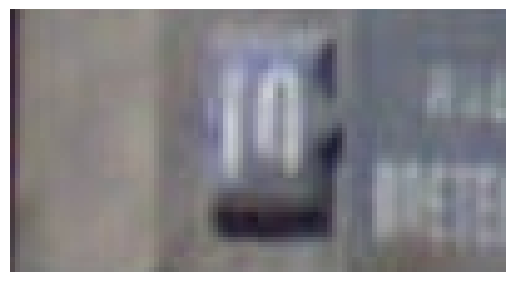

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the image path
test_image_path = '/content/drive/MyDrive/svhn_data/train/train/9393.png'

try:
    img = Image.open(test_image_path)

    # Display the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
except Exception as e:
    print(f"Error opening image: {e}")


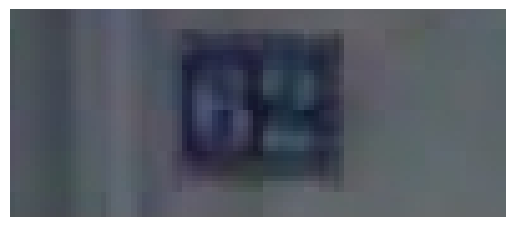

In [7]:
from PIL import Image
import os
import matplotlib.pyplot as plt

image_dir = '/content/drive/MyDrive/svhn_data/train/train'

# Loop through all the files
for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)
    if image_file.endswith('.png'):
        try:
            img = Image.open(image_path)
            # Use matplotlib to display the image inline
            plt.imshow(img)
            plt.axis('off')  # Turn off axis labels
            plt.show()  # Show the image
            break  # To just display the first image and stop, remove this line to loop through all images
        except Exception as e:
            print(f"Error opening {image_file}: {e}")


### 🧠 Decoding `digitStruct.mat`: Extracting Image Names and Digit Bounding Boxes



In [8]:
def get_name(index, f):
    """Extract filename from digitStruct.mat"""
    return f[f['digitStruct']['name'][index][0]][:].tobytes().decode('utf-8')

def get_box_data(index, hdf5_data):
    """Extract bounding box details for each digit in the image"""
    box = hdf5_data['/digitStruct/bbox'][index]
    meta_data = {'height': [], 'label': [], 'left': [], 'top': [], 'width': []}

    def extract_attr(attr_name, obj):
        if obj.shape[0] == 1:
            meta_data[attr_name].append(int(obj[0][0]))
        else:
            meta_data[attr_name] = [int(hdf5_data[obj[k][0]][0][0]) for k in range(obj.shape[0])]

    hdf5_data[box[0]].visititems(extract_attr)
    return meta_data


### 🔄 Extract and Preprocess Digits from SVHN Dataset (.mat Annotations)


In [9]:
def load_svhn_data(mat_file_path, image_dir, resize_to=(64, 64)):
    """Loads and processes images and labels from SVHN dataset"""
    mat_data = h5py.File(mat_file_path, 'r')
    num_samples = mat_data['/digitStruct/name'].size

    image_names = []
    box_labels = []

    print(f"Loading {num_samples} samples from: {mat_file_path}")

    for i in tqdm(range(num_samples)):
        image_names.append(get_name(i, mat_data))
        box_labels.append(get_box_data(i, mat_data))

    # Now, extract the digits from images
    cropped_digits = []
    labels = []

    for i, image_name in enumerate(tqdm(image_names)):
        # Load the image
        img = Image.open(os.path.join(image_dir, image_name))

        # Crop each digit using bounding box information
        for j in range(len(box_labels[i]['label'])):
            left = box_labels[i]['left'][j]
            top = box_labels[i]['top'][j]
            width = box_labels[i]['width'][j]
            height = box_labels[i]['height'][j]
            digit_image = crop_digit(img, left, top, width, height)

            # Resize and preprocess the cropped digit
            digit_image = preprocess_image(digit_image, target_size=(32, 32))

            cropped_digits.append(digit_image)
            labels.append(box_labels[i]['label'][j] % 10)  # Replace label '10' with '0' if necessary

    # Convert lists to numpy arrays
    X_data = np.array(cropped_digits)
    y_data = np.array(labels)

    return X_data, y_data


### 🔲 Display SVHN Image with Digit Bounding Boxes


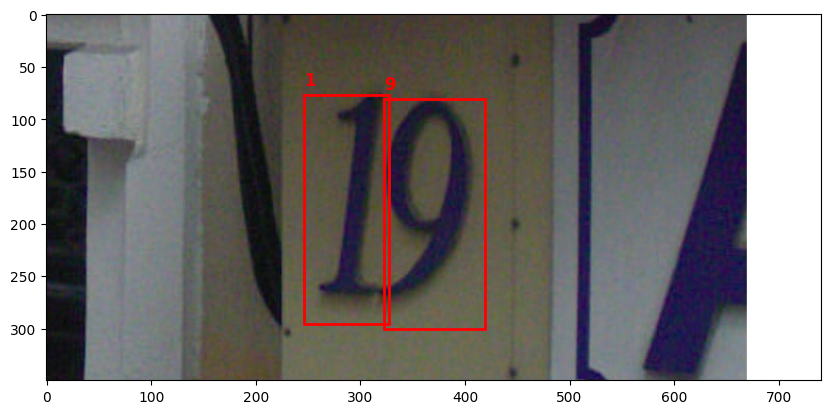

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Open the image using PIL
image_path = "/content/drive/MyDrive/svhn_data/train/train/1.png"
img = Image.open(image_path)

# Get bounding box data for the image
bbox_data = {'height': [219, 219], 'label': [1, 9], 'left': [246, 323], 'top': [77, 81], 'width': [81, 96]}

# Create a figure and axis for plotting
fig, ax = plt.subplots(1, figsize=(10, 10))

# Convert PIL image to a format suitable for matplotlib
ax.imshow(img)

# Add bounding boxes
for i in range(len(bbox_data['label'])):
    rect = patches.Rectangle(
        (bbox_data['left'][i], bbox_data['top'][i]),
        bbox_data['width'][i],
        bbox_data['height'][i],
        linewidth=2,
        edgecolor='r',
        facecolor='none'i
    )
    ax.add_patch(rect)
    ax.text(
        bbox_data['left'][i],
        bbox_data['top'][i] - 10,
        str(bbox_data['label'][i]),
        color='red',
        fontsize=12,
        weight='bold'
    )

# Display the image with bounding boxes
plt.show()


### ✂️ Crop Digits from Image Using Bounding Box Coordinates


In [78]:
from PIL import Image

def crop_digit(image, left, top, width, height):
    """Crop the image to the bounding box of the digit."""
    return image.crop((left, top, left + width, top + height))

# Loop through all bounding boxes and crop digits
cropped_digits = []
for i in range(len(bbox_data['label'])):
    # Get the image from file, assuming `img` is loaded elsewhere (or passed into the loop)
    img = Image.open(image_path)  # Replace 'image_path' with your actual image path

    # Crop the image based on the bounding box
    digit_image = crop_digit(img, bbox_data['left'][i], bbox_data['top'][i], bbox_data['width'][i], bbox_data['height'][i])

    # Optionally, show the cropped digit
    digit_image.show()

    # Append cropped digit to list
    cropped_digits.append(digit_image)

# At this point, `cropped_digits` contains the individual cropped digit images.


## Image Preprocessing and Label Encoding for Digit Classification

This code handles the preprocessing of cropped digit images by converting them to grayscale, resizing them to a fixed size, and normalizing the pixel values. It then one-hot encodes the labels for classification into 10 classes (digits 0-9).


In [12]:
import numpy as np
from tensorflow.keras.utils import to_categorical

def preprocess_image(image, target_size=(32, 32)):
    """Preprocess image: convert to grayscale, resize, and normalize."""
    # Convert image to grayscale
    image = image.convert('L')  # 'L' mode is grayscale
    # Resize image to a fixed size (e.g., 32x32)
    image = image.resize(target_size)
    # Convert to numpy array and normalize to [0, 1]
    image = np.array(image) / 255.0
    return image

# Preprocess each cropped digit
preprocessed_digits = []
for digit in cropped_digits:
    preprocessed_digits.append(preprocess_image(digit))

# Convert the list of preprocessed digits to a numpy array
X_train = np.array(preprocessed_digits)

# Assuming you have labels (e.g., digit labels from SVHN dataset)
# Here, we need to ensure your labels correspond to the cropped digits
y_train = np.array([1, 9])  # Example: Labels for the digits (replace with actual labels)

# One-hot encode the labels (for classification)
y_train = to_categorical(y_train, num_classes=10)  # Assuming 10 classes (digits 0-9)


## Model Architecture: CNN for SVHN Classification

This code defines a Convolutional Neural Network (CNN) for classifying the SVHN dataset. The model includes three convolutional layers with batch normalization, max pooling, and dropout to prevent overfitting, followed by dense layers for classification. It uses the Adam optimizer and sparse categorical crossentropy loss function for training.


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np

def build_model(input_shape=(32, 32, 3)):  # Update the input shape for RGB images
    model = Sequential()
    model.add(Input(shape=input_shape))  # Explicitly define input layer here
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout to prevent overfitting
    model.add(Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Build and display the model
model = build_model()
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

## Data Preprocessing and Augmentation

This code loads images from the SVHN dataset, performs label encoding, splits the data into training and validation sets, and applies data augmentation (e.g., rotation, shifting, flipping) to the training set. It also normalizes the image pixel values to the range [0, 1] for model input.



In [55]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the train and test directories
train_dir = '/content/drive/MyDrive/svhn_data/train'  # should contain folders: 0, 1, ..., 9
val_dir = '/content/drive/MyDrive/svhn_data/test/test'


# Image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def load_images_from_directory(directory, image_size=(32, 32)):
    images = []
    labels = []
    print(f"Loading images from directory: {directory}")  # Debug line
    for label in sorted(os.listdir(directory)):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            print(f"Processing label: {label}")  # Debug line
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                    try:
                        img = load_img(img_path, target_size=image_size)
                        img_array = img_to_array(img)
                        images.append(img_array)
                        labels.append(label)
                    except Exception as e:
                        print(f"Skipping file {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load datasets
X, y = load_images_from_directory(train_dir)

# Split X and y into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize image pixel values
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Encode labels (fit only on training data to avoid unseen labels)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)  # This line will now work properly

# Print shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")


Loading images from directory: /content/drive/MyDrive/svhn_data/train
Processing label: train
X_train shape: (26724, 32, 32, 3)
X_val shape: (6682, 32, 32, 3)
y_train shape: (26724,)
y_val shape: (6682,)


In [53]:
base_dir = '/content/drive/MyDrive/svhn_data'
mat_file_path = os.path.join(base_dir, 'test_digitStruct.mat')



In [54]:
print("✅ mat_file_path:", mat_file_path)


✅ mat_file_path: /content/drive/MyDrive/svhn_data/test_digitStruct.mat


## Implementing Early Stopping during Model Training


In [57]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Now train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 84s 189ms/step - accuracy: 0.8168 - loss: 0.6730 - val_accuracy: 1.0000 - val_loss: 2.7973e-04
Epoch 2/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 82s 189ms/step - accuracy: 0.9982 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 1.4016e-04
Epoch 3/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 78s 186ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 4.0777e-05
Epoch 4/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 81s 183ms/step - accuracy: 0.9997 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 1.7191e-05
Epoch 5/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 74s 176ms/step - accuracy: 0.9998 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 9.8796e-06
Epoch 6/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 84s 201ms/step - accuracy: 0.9999 - loss: 7.0713e-04 - val_accuracy: 1.0000 - val_loss: 4.3693e-06
Epoch 7/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 131s 175ms/step - accuracy: 1.0000 - loss: 3.8515e-04 - val_accuracy: 1.0000 - val_loss: 2.8129e-06
Epoch 8/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 70s 16

In [60]:
model.save('svhn_digit_classifier.keras')  #saving our model

In [61]:
import os
os.path.exists('svhn_digit_classifier.keras') #checking to confirm if the model was saved!


True

## Visualizing Model Predictions on Validation Set


209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step


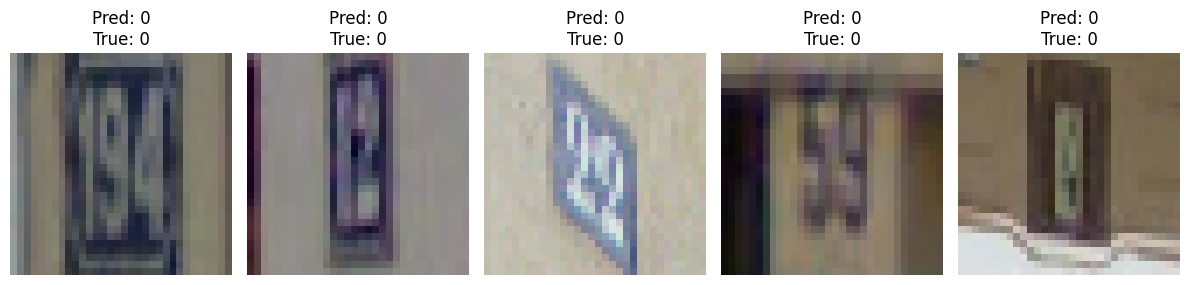

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on validation set
predictions = model.predict(X_val)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize a few predictions
num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_val[i])
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_val[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()



## Classification Report for Model Evaluation


In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_val, predicted_labels))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6682

    accuracy                           1.00      6682
   macro avg       1.00      1.00      1.00      6682
weighted avg       1.00      1.00      1.00      6682



## Confusion Matrix and Heatmap Visualization


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


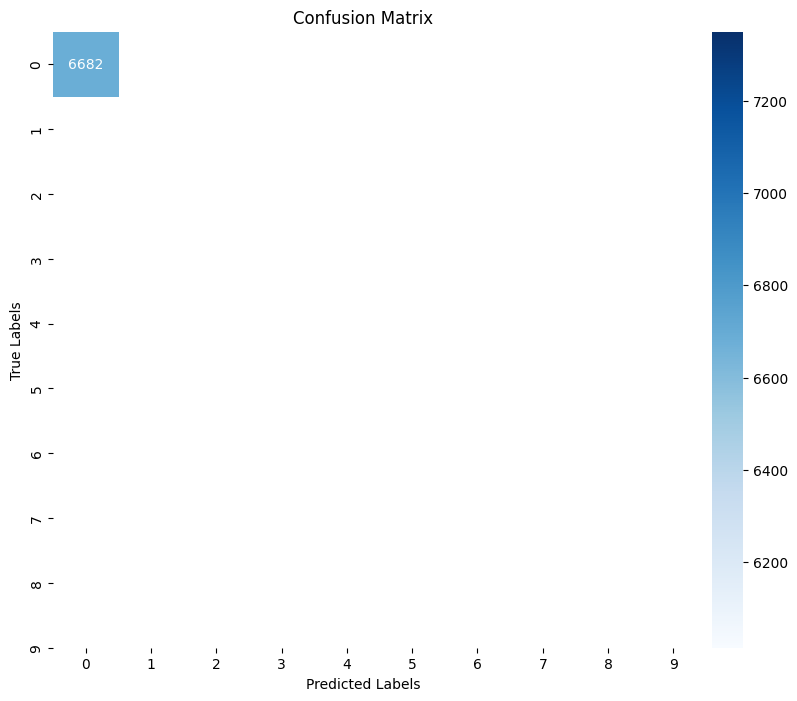

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_val, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Plotting Training and Validation Loss and Accuracy Over Epochs


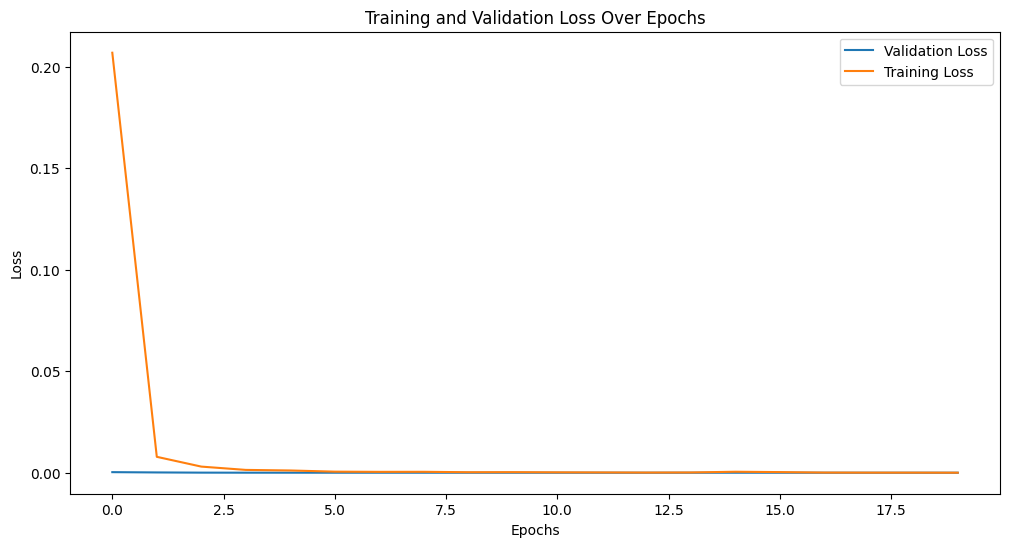

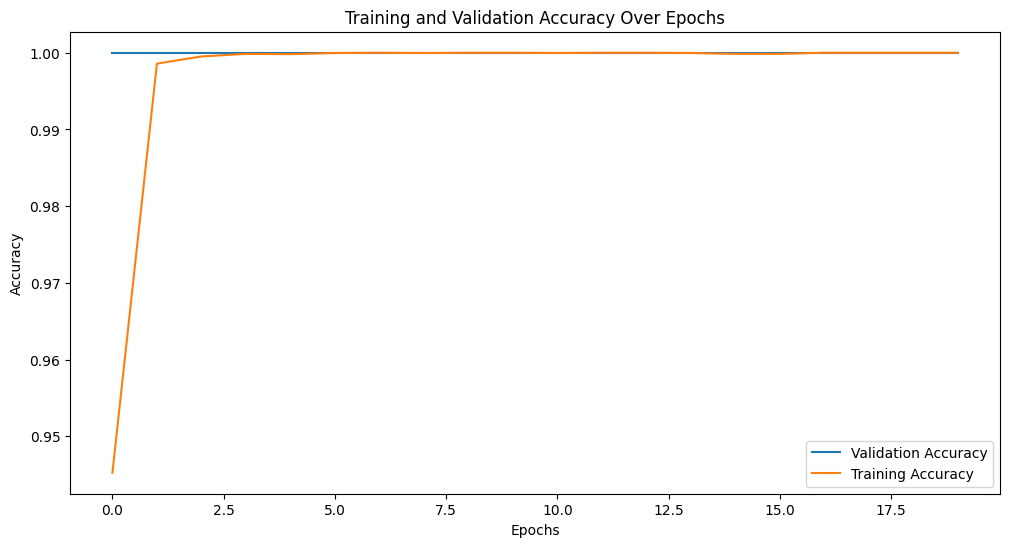

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Training and Validation Loss
plt.figure(figsize=(12, 6))
sns.lineplot(data=history.history['val_loss'], label='Validation Loss')
sns.lineplot(data=history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))
sns.lineplot(data=history.history['val_accuracy'], label='Validation Accuracy')
sns.lineplot(data=history.history['accuracy'], label='Training Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
